

---
MULTIPLE LINEAR REGRESSION
---



Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Importing dataset

In [67]:
dataset = pd.read_csv('Student_Performance.csv')  # Loading the dataset
X = dataset.iloc[:, :-1].values  # Extracting all columns except the last one as features
Y = dataset.iloc[:, -1].values  # Extracting the last column as the target variable
X[:, [2, 4]] = X[:, [4, 2]]  # Swapping the values of columns at index 2 and 4
print(X)

[[7 99 1 9 'Yes']
 [4 82 2 4 'No']
 [8 51 2 7 'Yes']
 ...
 [6 83 5 8 'Yes']
 [9 97 0 7 'Yes']
 [7 74 1 8 'No']]


Encoding Catagorical data

In [68]:
le = LabelEncoder()  # Creating an instance of LabelEncoder
X[:,4] = le.fit_transform(X[:,4])  # Encoding categorical values in the 5th column of X
print(X)

[[7 99 1 9 1]
 [4 82 2 4 0]
 [8 51 2 7 1]
 ...
 [6 83 5 8 1]
 [9 97 0 7 1]
 [7 74 1 8 0]]


Missing values

In [69]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  # Creating an imputer to replace NaN values with column means
imputer.fit(X)  # Fitting the imputer on X to compute column means
X = imputer.transform(X)  # Transforming X by replacing NaN values with computed means

Split data into train and test set

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1) # Splitting dataset into training and test set (0.8 : 0.2).

**Feature scaling**

In [71]:
sc = StandardScaler()  # Creating an instance of StandardScaler for feature scaling
X_train[:, :-1] = sc.fit_transform(X_train[:, :-1])  # Fitting and transforming training data (excluding the last column)
X_test[:, :-1] = sc.transform(X_test[:, :-1])  # Transforming test data using the same scaler fitted on training data
print(X_train)

[[-0.78 -0.31 -1.26 -0.91  0.  ]
 [-1.16 -0.19  0.49 -0.91  1.  ]
 [-0.78  1.25 -1.26 -0.91  0.  ]
 ...
 [ 1.16  1.36 -1.61  1.46  0.  ]
 [-0.78  1.65 -0.91  0.28  0.  ]
 [-0.78 -0.88 -0.56 -0.31  1.  ]]


Regression model

In [72]:
regressor = LinearRegression()  # Creating an instance of the Linear Regression model
regressor.fit(X_train, Y_train)  # Training the model using the training data (features and target variable)

LinearRegression()

predicting test set

In [73]:
Y_pred = regressor.predict(X_test)  # Predicting the target values for the test set
np.set_printoptions(precision=2)  # Setting the precision of printed floating-point numbers to 2 decimal places

# Concatenating predicted values (Y_pred) and actual values (Y_test) column-wise for comparison
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), axis=1))

[[61.17 58.  ]
 [63.8  64.  ]
 [77.76 75.  ]
 ...
 [64.39 67.  ]
 [29.79 33.  ]
 [31.21 33.  ]]


Evaluating Regression Model

In [74]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred) # higher values of R-squared indicates better fitting, values lies between 0 to 1.

0.9884855999665682

*Visualising regression line*

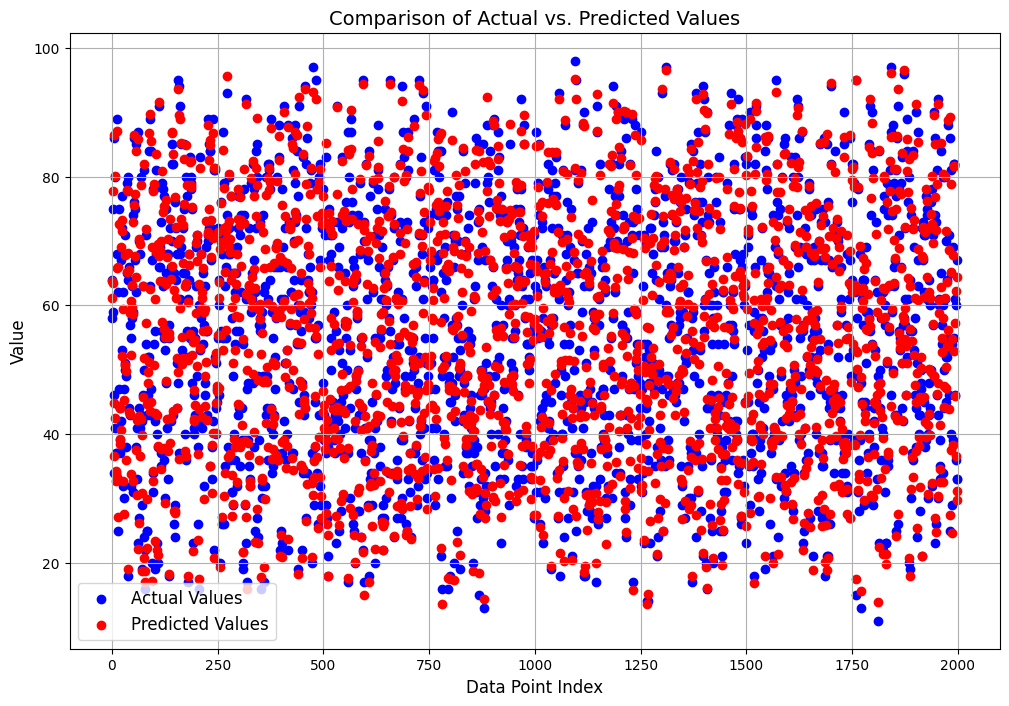

In [75]:
# Create x-axis values with the same length as Y_test
x_values = np.arange(len(Y_test))  # Create an array with values from 0 to 1999
plt.figure(figsize=(12, 8))
plt.scatter(x_values, Y_test, color='blue', label='Actual Values')
plt.scatter(x_values, Y_pred, color='red' , label='Predicted Values')
# Add labels and title
plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Comparison of Actual vs. Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()